In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles
import warnings
import seaborn as sns
import scipy.stats as st
import datetime

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = 20, 10

# **Задание 1**

Проанализировать набор данных и ответить на следующие вопросы:

1) Какой % наблюдений выходит за 5 и 95 перцентиль?

2) Какому закону распределения отвечают данные? На основе чего вы так решили?

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [59]:
!pip install fitter

     |████████████████████████████████| 47 kB 4.1 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25025 sha256=472d57eeb9cb3cd22849b01a096cbbbc44e7d1f12a86831332d137dc1143dd53
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.11.2-py3-none-any.whl size=64232 sha256=1981748ef0577b4b4650af02f09b0eb4a1d89c58622ebfec86d6f8c18f4bdf02
  Stored in directory: /root/.cache/pip/wheels/96/cd/8c/c22853ff02639ccd4dfa13a86257ee2cd6457ed6ed9a530bfa
Successfully built fitter easydev


In [3]:
df = pd.read_csv('https://drive.google.com/u/0/uc?id=1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW&export=download', sep=';', index_col=0)
df.head()

,metrics
1,1
2,1
3,4
4,1
5,1


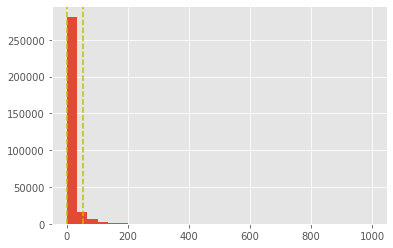

In [14]:
q_5, q_95 = df["metrics"].quantile([0.05, 0.95]).values

plt.hist([df["metrics"].values], bins=30)
plt.axvline(x=q_5, linewidth=1.5, color='y',linestyle='--')
plt.axvline(x=q_95, linewidth=1.5, color='y',linestyle='--');

In [22]:
# % наблюдений, выходящих за 5 и 95 перцентиль
1 - df.query("metrics >= @q_5 & metrics <= @q_95").__len__() / len(df) 

0.04987306046493434

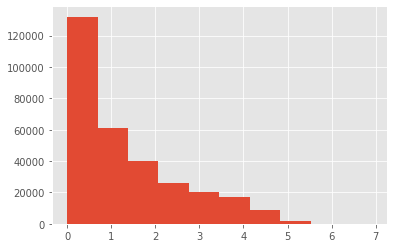

In [67]:
# логарифмируем
np.log(df.metrics).hist(bins=10);

--- 
Для аппроксимации распределения используем [Fitter](https://fitter.readthedocs.io)

In [60]:
from fitter import Fitter
f = Fitter(np.log(df["metrics"]), timeout=200)

In [61]:
f.fit()

,sumsquare_error,aic,bic,kl_div
halfgennorm,14.080926,806.156809,-3.065056e+06,inf
bradford,16.966793,584.950624,-3.007850e+06,inf
betaprime,17.149320,813.650356,-3.004554e+06,inf
gamma,17.640600,1186.778585,-2.995900e+06,inf
burr,18.520125,837.261908,-2.980958e+06,inf


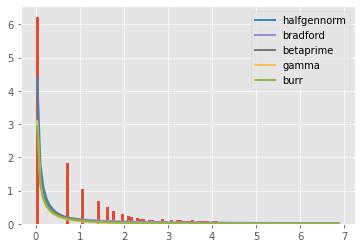

In [63]:
f.summary()

In [64]:
f.get_best()

{'halfgennorm': {'beta': 0.23705938770286283,
  'loc': -3.3808173636486213e-25,
  'scale': 0.0003448707613344957}}

Получаем такое распределение с параметрами `beta`, `loc`, `scale`.

# **Задание 2**

Определить, можно сравнить две представленные выборки t критерием Стьюдента? 

Если нельзя сравнивать t-критерием, то что будем использовать и почему?

Ответ аргументировать и описать 

[Ссылка на данные](https://drive.google.com/file/d/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

*Вместе с ответом на задание приложить код*

### Условия проведения t-test

Пусть необходимо проверить гипотезу о равенстве средних значений в двух независимых выборках. Для этой цели подходит критерий Стьюдента. Но применение критерия Стьюдента обосновано, только если данные подчиняются нормальному распределению. Поэтому перед применением критерия необходимо проверить гипотезу о нормальности исходных данных. Или проверка остатков линейной регрессии на нормальность — позволяет проверить, соответствует ли применяемая модель регрессии исходным данным.

Для применения t-критерия Стьюдента данные должны удовлетворять следующим условиям:

* Гомогенность дисперсий - дисперсии внутри наших групп должны быть приблизительно одинаковыми
* Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)
связные выборки:
* Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)

#### Проверка на нормальность
1. [Тест Лиллифорса на нормальность или экспоненциальное распределение.](https://www.statsmodels.org/v0.10.2/generated/statsmodels.stats.diagnostic.lilliefors.html#statsmodels.stats.diagnostic.lilliefors)

Критерий Лиллифорса (Lilliefors) является вариантом известного классического критерия Колмогорова-Смирнова, специально модифицированного для проверки нормальности. Эта модификация существенна. Для проверки гипотезы нормальности нельзя использовать классический непараметрический критерий Колмогорова-Смирнова

$H_0$: данные были получены из нормального / экспоненциального распределения

$H_A$: данные не были получены из нормального / экспоненциального распределения

* Если значение pvalue ниже некоторого порогового значения, например 0,05, то мы можем отвергнуть нулевую гипотезу о том, что выборка исходит из нормального распределения


2. Тест Шапиро-Уилка

Тест Шапиро-Уилка проверяет нулевую гипотезу о том, что данные были получены из нормального распределения.

$H_0$: данные были получены из нормального распределения

$H_A$: данные не были взяты из нормального распределения

if p_value > 0.05:
* мы не можем отвергнуть нулевую гипотезу о том, что выборка исходит из нормального распределения

еще:
* мы можем отвергнуть нулевую гипотезу о том, что выборка исходит из нормального распределения

3. Тест Андерсона-Дарлинга для данных, поступающих из конкретного распределения.

Тест Андерсон-Дарлинга проверяет нулевую гипотезу о том, что выборка берется из популяции, которая следует определенному распределению. Для критерия Андерсона-Дарлинга критические значения зависят от того, с каким распределением проводится проверка. Эта функция работает для нормального, экспоненциального, логистического, или Гумбеля (экстремальный тип значения I) распределения.

$H_0$: данные были получены из нормального распределения

$H_A$: данные не были взяты из нормального распределения


In [62]:
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro
from scipy.stats import anderson

In [68]:
df = pd.read_csv("https://drive.google.com/u/0/uc?id=1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy&export=download", delimiter=";", index_col=0)
df

,variant,metrics
1,A,1
2,B,1
3,A,4
4,B,37
5,B,4
...,...,...
184200,A,12
184201,A,8
184202,B,11
184203,B,81


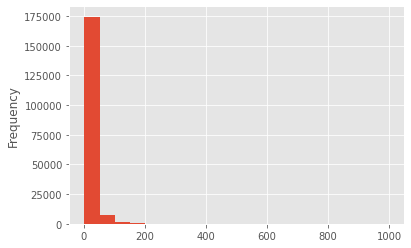

In [76]:
df["metrics"].plot(kind="hist", bins=20);

In [77]:
ksstat_lil, p_value_lil = lilliefors(df["metrics"])
statistic, crit_values, significance_level = anderson(df["metrics"], dist='norm')
_, p_value_shapiro = shapiro(df["metrics"])

In [78]:
for i in range(len(crit_values)):
	sl, cv = significance_level[i], crit_values[i]
	if statistic < crit_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [80]:
alpha = 0.05
if p_value_lil > alpha:
	print('Sample looks Gaussian (fail to reject H0) Lilliefors-test')
else:
	print('Sample does not look Gaussian (reject H0) Lilliefors-test')

Sample does not look Gaussian (reject H0) Lilliefors-test


In [81]:
alpha = 0.05
if p_value_shapiro > alpha:
	print('Sample looks Gaussian (fail to reject H0) Shapiro-Wilk-test')
else:
	print('Sample does not look Gaussian (reject H0) Shapiro-Wilk-test')

Sample does not look Gaussian (reject H0) Shapiro-Wilk-test


QQ-plot

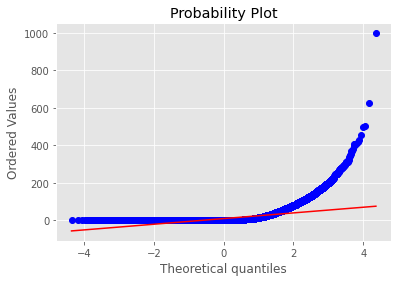

In [95]:
stats.probplot(df["metrics"], dist="norm", plot=plt);

Получили, что мы отвергаем гипотезу о нормальности в трех тестах, поэтому применять t-test невозможно. Но если данные проходили по тестам, то нужно было бы проверить на гомогенность дисперсий с помощью критерия Левена (для двух выборок) или с помощью Барлетта.

Тогда используем критерий Манна-Уитни-Вилкоксона - статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно. Позволяет выявлять различия в значении параметра между малыми выборками.

$H_0$: равенсто медиан распределений ранговых значений

$H_A$: неравенсто медиан распределений ранговых значений

In [82]:
from scipy.stats import mannwhitneyu

In [83]:
group_A = df[df["variant"] == "A"]["metrics"]
group_B = df[df["variant"] == "B"]["metrics"]

In [84]:
_, pvalue = mannwhitneyu(group_A, group_B)

In [85]:
alpha = 0.05
if pvalue > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Different distribution (reject H0)


Нулевая гипотеза отвергается на выбранном уровне значимости, и различия между выборками признаются статистически значимыми.

# **Задание 3**

Дано две выборки по А/Б тесту.

Две выборки несбалансированные - кол-во пользователей в каждой группе разные.

Метрика, которую меряем в эксперименте (и которую используем для определения группы, которая лучше себя показала) - кол-во просмотренных страниц на пользователя 

Как вы будете принимать решение, какая группа лучше А или Б, и какие статистические методы (критерии) вы будете использовать, какие преобразования к данным применять? P.S. Вам может помочь лекция Виталия Черемисинова, где он рассказывал про А/Б тесты

[Ссылка на данные](https://drive.google.com/file/d/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [86]:
df = pd.read_csv("https://drive.google.com/u/0/uc?id=1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba&export=download", delimiter=";", index_col=0)
df

,variant,metrics
1,A,1
2,A,4
3,A,15
4,A,1
5,A,10
...,...,...
108095,D,1
108096,A,1
108097,A,12
108098,A,8


In [87]:
df.groupby(["variant"]).count()

,metrics
variant,
A,92686
D,15413


In [88]:
group_A = df[df.variant == "A"]
group_B = df[df.variant == "D"]

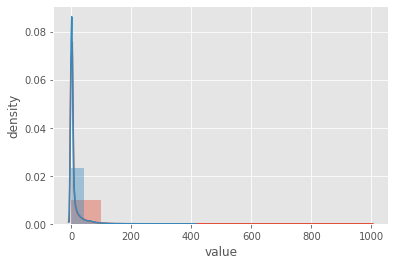

In [92]:
sns.distplot(group_A["metrics"].values, label='A', bins=10)
sns.distplot(group_B["metrics"].values, label='D', bins=10)

plt.xlabel('value')
plt.ylabel('density')
plt.show()

In [98]:
from sklearn.utils import resample

def bootstrap(sample, size=5000, boot=100000):
    boot_means = np.zeros(boot)
    for i in range(boot):
        bootsample = resample(sample, n_samples=size, replace=True)
        boot_means[i] = bootsample.mean()
    return boot_means

In [99]:
# бутстрепинг — операция, занимающая значительное время
boot = 100000
bootmean_A = bootstrap(group_A.metrics.to_numpy(), boot=boot)
bootmean_B = bootstrap(group_B.metrics.to_numpy(), boot=boot)

In [100]:
a_q5, a_q95 = np.quantile(bootmean_A, [0.05, 0.95])
b_q5, b_q95 = np.quantile(bootmean_B, [0.05, 0.95])

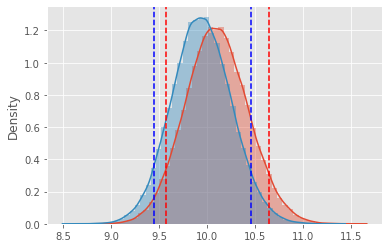

In [101]:
sns.distplot(bootmean_A, label='A')
sns.distplot(bootmean_B, label='B')
plt.axvline(x=a_q5, linewidth=1.5, color='r', linestyle='--')
plt.axvline(x=a_q95, linewidth=1.5, color='r', linestyle='--')
plt.axvline(x=b_q5, linewidth=1.5, color='b', linestyle='--')
plt.axvline(x=b_q95, linewidth=1.5, color='b', linestyle='--');

Вывод сделать просто — мы получим две плотности вероятности для каждой ветки эксперимента и сможем сравнивать, как пересекаются эти плотности. Если у нас перекрываются 0.5 и 0.95 квантили, значит нет статистически значимой разницы. Но не будем мелочиться и посчитаем p-value.

In [116]:
p_value = np.sum((group_A.metrics.mean() - group_B.metrics.mean()) <= np.abs(bootmean_A - bootmean_B)) / boot

In [117]:
p_value

0.74125

Получили значение больше, чем 0.05, что означает, что нет  статистически значимой разницы

Кстати, можно было еще применить данную библиотеку для бутстрапа:  https://github.com/facebookincubator/bootstrapped

# **Задание 4**

Есть данные с большой дисперсии у метрики (диспресию метрики можно посчитать для каждой группы). Для их дальнейшего анализа дисперсию необходимо сократить. Как определить, что дисперсия действительно большая? Если она большая, как вы будете ее чистить? Ответ аргументировать и описать.  P.S. Вам может помочь лекция Виталия Черемисинова, где он рассказывал про А/Б тесты

Описание данных: 

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

*Вместе с ответом на задание приложить код*

In [118]:
df = pd.read_csv("https://drive.google.com/u/0/uc?id=1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW&export=download", delimiter=";", index_col=0)
df

,metrics
1,1
2,1
3,4
4,1
5,1
...,...
306835,8
306836,11
306837,1
306838,81


[Статья](https://www.thinkwithgoogle.com/intl/ru-ru/products-tools/analytical-tools/money-and-ab-tests/)

Как стабилизировать данные, чтобы было проще сравнить средние при помощи критерия? Почистить данные.

Можем убрать все значения, которые выходят за N стандартных отклонений от среднего и воспринимать их как выбросы. Отрезав эти выбросы, мы стабилизируем выборку, что позволит проще посчитать метрики.

In [119]:
df.metrics.var()

511.99823268544515

Первая мысль: уберем возможные "выбросы". Для этого найдем 99-квантиль и оставим все значения, которые меньше этого значения

In [122]:
q_99 = df["metrics"].quantile(0.99)
df_clear = df[df["metrics"] <= q_99]

Найдем дисперсию

In [123]:
df_clear.metrics.var()

279.8730552637073

Уменьшили почти в два раза, но может произойти такое, что мы убрали важных для нас покупателей, что нивелирует пользу от уменьшения дисперсии таким способом

Тогда используем трансформацию Бокса-Кокса.

In [124]:
box_cox_metrics, _= stats.boxcox(df.metrics)

In [125]:
box_cox_metrics.var()

0.43416179602413135

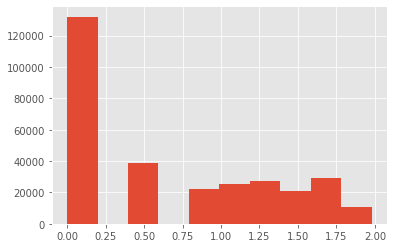

In [126]:
plt.hist(box_cox_metrics);

Дисперсия уменьшена! Но стоит помнить, что иметь дела мы теперь будем 

$$y = \begin{cases} 
\frac{(x^\lambda - 1)}{\lambda}, &  \lambda > 0\\ 
log(x), & \lambda = 0 
\end{cases}$$

с такими данными, поэтому после эксперимента мы должны будем вернуть изначальную величину


----
Также мы можем воспользуемся децильным  [методом уменьшении дисперсии](https://medium.com/statistics-experiments/децильный-метод-или-сокращение-дисперсии-c06758059727). Каждому значению присвоем номер децили, которой оно соответствует.

In [134]:
df_clear = df_clear.assign(decile = pd.qcut(df_clear.metrics.rank(method='first'), 10).values.codes)

In [136]:
df_clear.groupby('decile').var()

,metrics
decile,
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.226154
5,0.234355
6,0.481585
7,2.013268
8,21.466560


---
Можно еще попробовать бакетирование, но не уверен, что работает правильно. Так что на этом задание всё. 

In [137]:
number_of_bucket = 100

In [138]:
df_clear['bucket'] = np.random.randint(0, number_of_bucket, size=len(df_clear))

In [139]:
df_clear

,metrics,decile,bucket
1,1,0,10
2,1,0,68
3,4,6,47
4,1,0,49
5,1,0,48
...,...,...,...
306835,8,7,72
306836,11,8,83
306837,1,4,36
306838,81,9,95


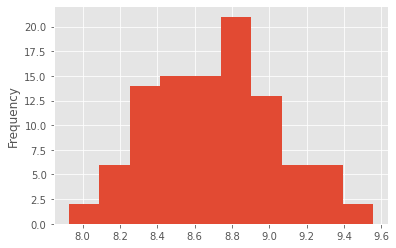

In [140]:
df_clear.groupby(['bucket']).mean()['metrics'].plot(kind='hist');

# **Задание 5**

Есть эксперимент с поисковыми подсказками. Вы хотим узнать, как изменился CTR в каждой группе эксперимента.

**Данные**

- id - уникальный идентификатор пользователя
- action - количество кликов
- view - кол-во просмотров на одну сессию
- variant - вариант a/b теста, где 0 - это версия "A", 1 -  версия "B".

**Задача**

- сформировать метрику для оценки эксперимента
- подобрать критерий под особенности данных
- сделать вывод о значимости эффекта

**Данные** 

[Ссылка на данные](https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv)

In [144]:
!wget -O test_5.csv https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv

--2021-09-08 17:10:23--  https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fdki267uilkfq7l/task5.csv [following]
--2021-09-08 17:10:23--  https://www.dropbox.com/s/raw/fdki267uilkfq7l/task5.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf8b10d56ade00eab90e7366189.dl.dropboxusercontent.com/cd/0/inline/BVzoh6OPrxU8_cYmM0AsuzcOPw2DRnSP9A-0f8nQOSfg1fi3n9jxJaGFJ0pTeRAN2l383HtV5alHBvVS55Vpl4uoVhH5b08OIpO70AirOieE0jnJFDpmbBFNGLhCEuvF3tnDkWaQDqUiA-eAeBR0QvnX/file# [following]
--2021-09-08 17:10:23--  https://ucf8b10d56ade00eab90e7366189.dl.dropboxusercontent.com/cd/0/inline/BVzoh6OPrxU8_cYmM0AsuzcOPw2DRnSP9A-0f8nQOSfg1fi3n9jxJaGFJ0pTeRAN2l383HtV5alHBvVS55Vpl4uoVhH5b08OIp

Посмотрим на определение CTR. CTR - это показатель кликабельности. Это процент людей, которые нажимают на вашу рекламу. Его выражают через отношение количество кликов на количество просмотров, т.е. это пропорция. Применим [z-test](https://www.statisticshowto.com/z-test/) для двух пропорций.



$H_0$ для теста состоит в том, что пропорции одинаковы.

$H_A$ состоит в том, что пропорции не совпадают.

In [145]:
df = pd.read_csv("test_5.csv")
df

,id,variant,view,action
0,88258,A,10,2
1,109938,A,3,1
2,117644,A,7,5
3,374080,A,9,9
4,662082,A,1,1
...,...,...,...,...
8186,7706713,B,1,1
8187,7875223,B,1,1
8188,4617329,B,9,4
8189,5394863,B,5,1


Можно использовать Id для бакетирования, но мы посмотрим значения z-статистики для пропорции

In [146]:
group_A = df[df.variant == "A"]
group_B = df[df.variant == "B"]

In [147]:
group_data = df.groupby('variant')[['view', 'action']].sum()
group_data

,view,action
variant,,
A,20303,12369
B,15883,9627


Используем z-test для пропорций

In [148]:
conversions = group_data['action']
clicks = group_data['view']

In [149]:
from statsmodels.stats.proportion import proportions_ztest

zscore, pvalue = proportions_ztest(conversions, clicks, alternative='two-sided')
print('zscore = {:.4f}, pvalue = {:.4f}'.format(zscore, pvalue))

zscore = 0.5995, pvalue = 0.5488


In [155]:
p_1, p_2 = group_data.apply(lambda x: x[1] / x[0], axis=1).to_numpy()

In [173]:
p = np.divide(*group_data.sum().to_numpy()[::-1]) # (group_data['action']['A']+group_data['action']["B"]) / (group_data['view']["A"]+group_data['view']["B"])

z_static_obs = (p_1 - p_2)/ np.sqrt(p * (1-p) * (1 / group_data['view']).sum()) # (1 / group_data['view']['A'] + 1 / group_data['view']['B'])

In [174]:
z_static_obs

0.5995066080068987

В результате p-value= 0.5488 > alpha=0.05 и мы не можем отклонить H0, что означает, что высокий CTR, наблюдаемый в экспериментальной группе, обусловлен  случайностью. Рекомендация для маркетинговой команды / команды продуктов заключается в том, чтобы не развертывать этот новый план/изменения.

In [176]:
def bootstrap_for_proportion(action_a, action_b, view_a, view_b, boot=10000):
    """
    https://www.statisticshowto.com/z-test/
    """
    statistics = np.zeros(boot)
    for i in range(boot):
        # actions
        bootsample_action_A = resample(action_a, n_samples=len(action_a), replace=True)
        bootsample_action_B = resample(action_b, n_samples=len(action_b), replace=True)
        # views
        bootsample_view_A = resample(view_a, n_samples=len(view_a), replace=True)
        bootsample_view_B = resample(view_b, n_samples=len(view_b), replace=True)
        # sums
        boot_action_a = bootsample_action_A.sum()
        boot_action_b = bootsample_action_B.sum()
        boot_view_a = bootsample_view_A.sum()
        boot_view_b = bootsample_view_B.sum()
        # proportions
        p_a = boot_action_a / boot_view_a
        p_b = boot_action_b / boot_view_b

        p = (boot_action_a + boot_action_b) / (boot_view_a + boot_view_b)
        z_statistic = (p_a - p_b) / np.sqrt(p * (1-p) * (1 / boot_view_a + 1 / boot_view_b))
        statistics[i] = z_statistic
    
    return statistics

In [178]:
boot = 10000
z_statistics_bootstrap = bootstrap_for_proportion(group_A.action, group_B.action,
                                                  group_A.view, group_B.view, boot)

In [179]:
pvalue = np.sum(z_statistics_bootstrap >= z_static_obs) / boot
pvalue

0.4989

Заметим, что p_value ниже, чем в proportions_ztest, но при этом мы все еще не можем отклонить $H_0$